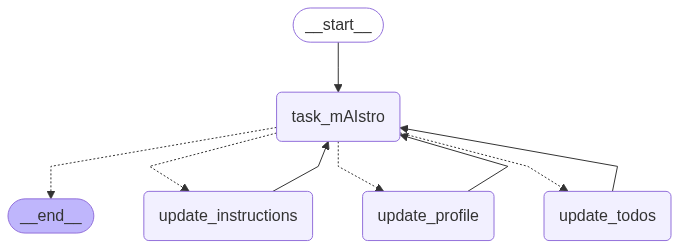

In [1]:
from IPython.display import Image, display
from modules.task_maistro import task_maistro
from modules.core_instance import get_instance

graph = get_instance("task_maistro").graph
model = get_instance("task_maistro").model

# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [30]:
from pprint import pprint
from langgraph_sdk import get_client

# Connect via SDK
url_for_cli_deployment = "http://localhost:8123"
client = get_client(url=url_for_cli_deployment)

In [31]:
# Create a thread
thread = await client.threads.create()
thread

{'thread_id': '3c01d8a4-15e2-4afe-bf5c-b7f32c8d74de',
 'created_at': '2025-07-10T03:21:44.070840+00:00',
 'updated_at': '2025-07-10T03:21:44.070841+00:00',
 'metadata': {},
 'status': 'idle',
 'config': {},
 'values': None}

In [32]:
from langchain_core.messages import HumanMessage
from langchain_core.messages import convert_to_messages
from langgraph_sdk.schema import Config

# Ensure we've created some ToDos and saved them to my user_id
user_input = "Add a ToDo to finish booking travel to Hong Kong by end of next week. Also, add a ToDo to call parents back about Thanksgiving plans."
config: Config = {"configurable": {"user_id": "Test"}}
graph_name = "task_maistro" 

# Run the graph from the new checkpoint in the thread
async for chunk in client.runs.stream(thread["thread_id"], 
                                      graph_name, 
                                      input={"messages": [HumanMessage(content=user_input)]},
                                      config=config,
                                      stream_mode="values"):

    if chunk.event == "values":
        for m in convert_to_messages([chunk.data['messages'][-1]]):
            m.pretty_print() 
            print('\n')

================================ Human Message =================================

Add a ToDo to finish booking travel to Hong Kong by end of next week. Also, add a ToDo to call parents back about Thanksgiving plans.


================================== Ai Message ==================================
Tool Calls:
  UpdateMemory (call_cfkkcxL4o1imrAW7bAIVR1zs)
 Call ID: call_cfkkcxL4o1imrAW7bAIVR1zs
  Args:
    update_type: todo


================================= Tool Message =================================

New ToDo created:
Content: {'task': 'Finish booking travel to Hong Kong', 'time_to_complete': 120, 'deadline': '2025-07-18T23:59:59', 'solutions': ['Check flight prices on Skyscanner', 'Book hotel through Booking.com', 'Arrange airport transfer'], 'status': 'not started'}


================================== Ai Message ==================================
Tool Calls:
  UpdateMemory (call_aFKGbVknGTFUKACF8KZP2JWv)
 Call ID: call_aFKGbVknGTFUKACF8KZP2JWv
  Args:
    update_type: todo


=